<a href="https://colab.research.google.com/github/gdnunesfalcon/execel_com_python/blob/main/OrganizandoUsuarioPorGrupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contexto: Esse notebook foi criado para reestruturar um arquivo excel organizando os usuários por grupos/setor/departamento em abas distintas, para aprender manipulação de dados na linguagem Python

ARQUIVO DE ENTRADA: usuarios.xlsx

COLUNAS: nome, cpf, setor

EXEMPLO:

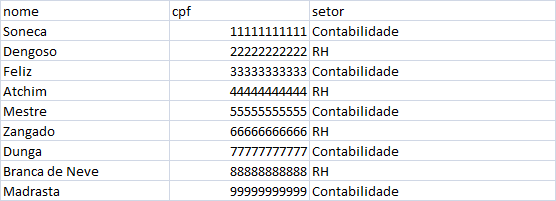

ARQUIVO DE SAÍDA: usuariosPorSetor.xlsx

COLUNAS: nome, cpf, setor

DADOS SEPARADOS EM DUAS ABAS: RH, Contabilidade

EXEMPLO:

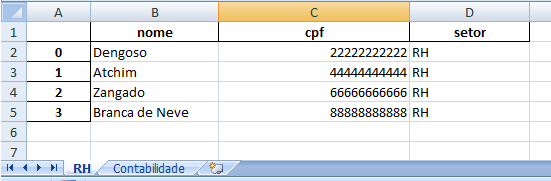

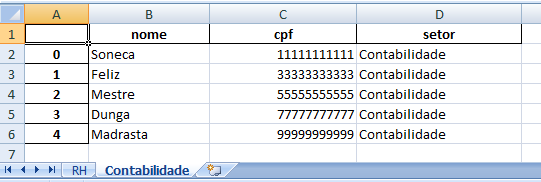


Importando bibliotecas

In [ ]:
# Importando biblioteca openpyxl para trabalhar com arquivos excel
import openpyxl

# Importando pacote pandas para gravar excel em novo formato
import pandas as pd


EXTRAÇÃO - Fazendo leitura do arquivo

In [ ]:
# fazendo a leitura do arquivo
wb = openpyxl.load_workbook(filename='/content/usuarios.xlsx')
# visualizando as abas existentes
wb.sheetnames

['usuario']

In [ ]:
# lendo as linhas do arquivo
for linha in wb['usuario'].iter_rows(values_only = True):
        print(linha)

('nome', 'cpf', 'setor')
('Soneca', 11111111111, 'Contabilidade')
('Dengoso', 22222222222, 'RH')
('Feliz', 33333333333, 'Contabilidade')
('Atchim', 44444444444, 'RH')
('Mestre', 55555555555, 'Contabilidade')
('Zangado', 66666666666, 'RH')
('Dunga', 77777777777, 'Contabilidade')
('Branca de Neve', 88888888888, 'RH')
('Madrasta', 99999999999, 'Contabilidade')
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)
(None, None, None)


TRANSFORMAÇÃO - separando e distribuindo a informação por setor nos respectivos dicionários

In [ ]:
ws = wb['usuario']

max_row = ws.max_row
max_col = ws.max_column

# Criando um dicionario para cada setor
ds_contabilidade = []
ds_rh = []

# carregando os dicionarios
for row in ws.iter_rows(min_row=2, max_row=max_row, max_col=max_col):
    _dict = dict(nome=row[0].value, cpf=row[1].value, setor=row[2].value)
    if (_dict['setor'] == 'Contabilidade'):
      ds_contabilidade.append(_dict)
    elif (_dict['setor'] == 'RH'):
      ds_rh.append(_dict)
    #data.append(_dict)
    #print(_dict)


In [ ]:
print(ds_rh)

[{'nome': 'Dengoso', 'cpf': 22222222222, 'setor': 'RH'}, {'nome': 'Atchim', 'cpf': 44444444444, 'setor': 'RH'}, {'nome': 'Zangado', 'cpf': 66666666666, 'setor': 'RH'}, {'nome': 'Branca de Neve', 'cpf': 88888888888, 'setor': 'RH'}]


In [ ]:
print(ds_contabilidade)

[{'nome': 'Soneca', 'cpf': 11111111111, 'setor': 'Contabilidade'}, {'nome': 'Feliz', 'cpf': 33333333333, 'setor': 'Contabilidade'}, {'nome': 'Mestre', 'cpf': 55555555555, 'setor': 'Contabilidade'}, {'nome': 'Dunga', 'cpf': 77777777777, 'setor': 'Contabilidade'}, {'nome': 'Madrasta', 'cpf': 99999999999, 'setor': 'Contabilidade'}]


CARGA - Exportando para um único documento excelporém em abas separadas por setor

In [ ]:
# Exportar para o excel em duas abas no arquivo

tb_contabilidade = pd.DataFrame.from_records(ds_contabilidade)
tb_rh = pd.DataFrame.from_records(ds_rh)
with pd.ExcelWriter('usuariosPorSetor.xlsx') as writer:
    tb_rh.to_excel(writer, sheet_name='RH')
    tb_contabilidade.to_excel(writer, sheet_name='Contabilidade')

Referencias utilizadas:

[Abrindo arquivos Excel em Python: explorando a performance de diferentes algoritmos](
https://medium.com/@andersoneduardo_50576/abrindo-arquivos-excel-em-python-833de325df70)

[Dica 33 - Importando XLSX com OpenPyXL](https://www.dicas-de-django.com.br/099-33-import-xlsx)

[python - armazenar resultado do for em um dict e exportar para excel](https://forum.casadodesenvolvedor.com.br/topic/45213-python-armazenar-resultado-do-for-em-um-dict-e-exportar-para-excel/)